In [1]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [26]:
# Ejemplo Cookbook -----------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 8.0
k2 = 40.0
# Natural lengths
L1 = 0.5
L2 = 1.0
# Friction coefficients
b1 = 0.8
b2 = 0.5

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.5
y1 = 0.0
x2 = 2.25
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

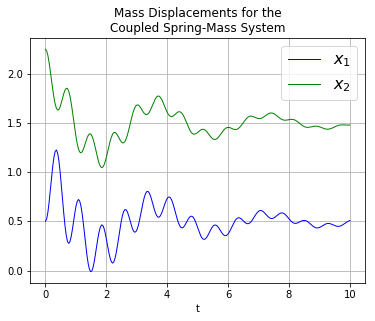

In [3]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('two_springs.png', dpi=100)

In [6]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,    x1a, x2a = aL2,b1,b2]
        a :  vector of analitic state variables:
                  a = [x1a,x2a]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [7]:
# Ejemplo 2.1 ------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint
import numpy as np
import math

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 6.0
k2 = 4.0
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0
b2 = 0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1.0
y1 = 0.0
x2 = 2.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo2-1.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3],np.abs((w1[0]-(np.cos(np.sqrt(2)*t1)))/(np.cos(np.sqrt(2)*t1))), np.abs((w1[2]-(2*np.cos(np.sqrt(2)*t1)))/(2*np.cos(np.sqrt(2)*t1))), file=f)

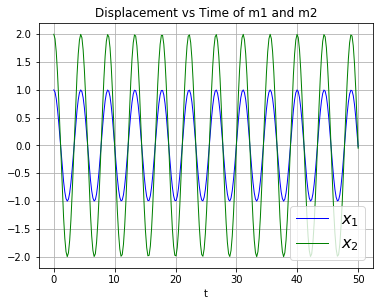

In [8]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2, e1, e2 = loadtxt('ejemplo2-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Displacement vs Time of m1 and m2')
savefig('ejemplo2-1.png', dpi=100)

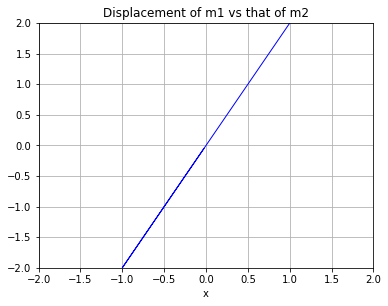

In [29]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2, e1, e2 = loadtxt('ejemplo2-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)
plt.ylim(-2,2)
plt.xlim(-2,2)

title('Displacement of m1 vs that of m2')
savefig('recta2-1.png', dpi=100)

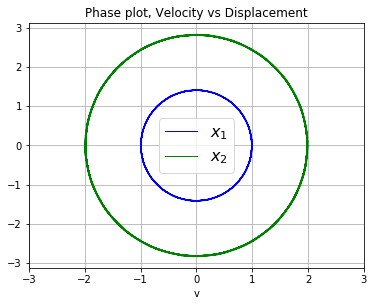

In [32]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo2-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)
plot(x2, y2, 'g', linewidth=lw)
plt.xlim(-3,3)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Phase plot, Velocity vs Displacement')
savefig('circulo2-1.png', dpi=100)

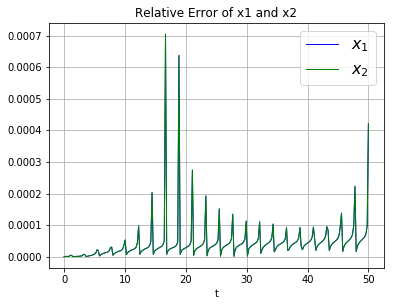

In [11]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo2-1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, e1, 'b', linewidth=lw)

plot(t, e2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Relative Error of x1 and x2')
savefig('error2-1.png', dpi=100)

In [12]:
# Ejemplo 2.2 ------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 6.0
k2 = 4.0
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0
b2 = 0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -2.0
y1 = 0.0
x2 = 1.0
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 25.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo2-2.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3],np.abs((w1[0]-(-2*np.cos(2*np.sqrt(3)*t1)))/(-2*np.cos(2*np.sqrt(3)*t1))), np.abs((w1[2]-(np.cos(2*np.sqrt(3)*t1)))/(np.cos(2*np.sqrt(3)*t1))), file=f)

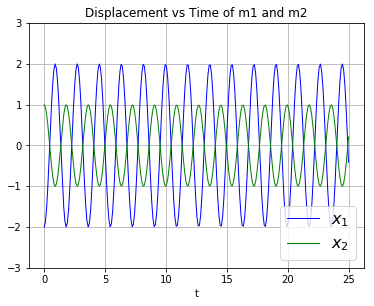

In [33]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo2-2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)
plt.ylim(-3,3)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Displacement vs Time of m1 and m2')
savefig('ejemplo2-2.png', dpi=100)

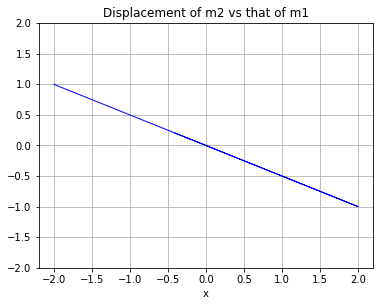

In [38]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo2-2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)
plt.ylim(-2,2)


title('Displacement of m2 vs that of m1')
savefig('recta2-2.png', dpi=100)

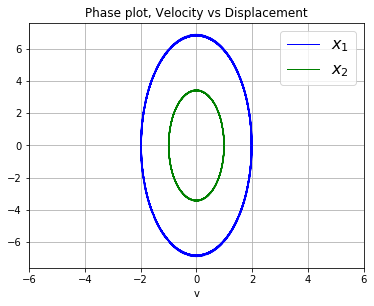

In [41]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo2-2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(x1, y1, 'b', linewidth=lw)
plot(x2, y2, 'g', linewidth=lw)
plt.xlim(-6,6)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Phase plot, Velocity vs Displacement')
savefig('circulo2-2.png', dpi=100)

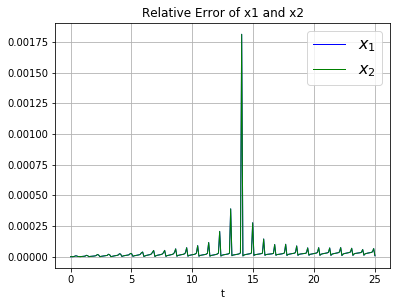

In [16]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo2-2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, e1, 'b', linewidth=lw)

plot(t, e2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Relative Error of x1 and x2')
savefig('error2-2.png', dpi=100)

In [17]:
# Ejemplo 2.3 ------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0
b2 = 0

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.5
y1 = 0
x2 = -0.5
y2 = 0.7

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo2-3.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

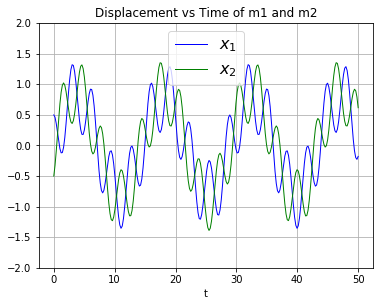

In [42]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo2-3.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)
plt.ylim(-2,2)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Displacement vs Time of m1 and m2')
savefig('ejemplo2-3.png', dpi=100)

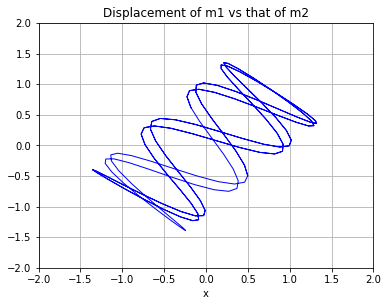

In [43]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo2-3.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)
plt.ylim(-2,2)
plt.xlim(-2,2)


title('Displacement of m1 vs that of m2')
savefig('recta2-3.png', dpi=100)

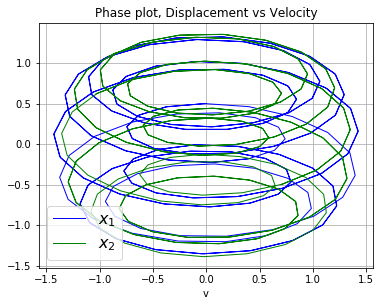

In [20]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo2-3.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(y1, x1, 'b', linewidth=lw)

plot(y2, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Phase plot, Displacement vs Velocity')
savefig('circulo2-3.png', dpi=100)

In [21]:
# Ejemplo 2.3 ------------------------------------------------------------------
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0.1
b2 = 0.2

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 1
y1 = 0.5
x2 = 2
y2 = 0.5

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo2-4.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

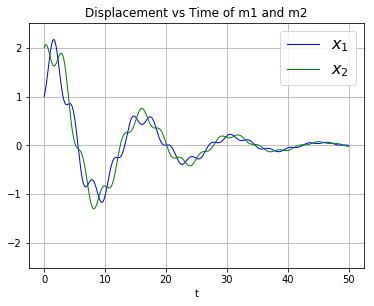

In [45]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, xy, x2, y2 = loadtxt('ejemplo2-4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)
plt.ylim(-2.5,2.5)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Displacement vs Time of m1 and m2')
savefig('ejemplo2-4.png', dpi=100)

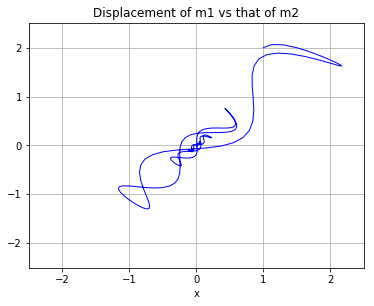

In [46]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo2-4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('x')
grid(True)
#hold(True)
lw = 1

plot(x1, x2, 'b', linewidth=lw)
plt.ylim(-2.5,2.5)
plt.xlim(-2.5,2.5)


title('Displacement of m1 vs that of m2')
savefig('recta2-4.png', dpi=100)

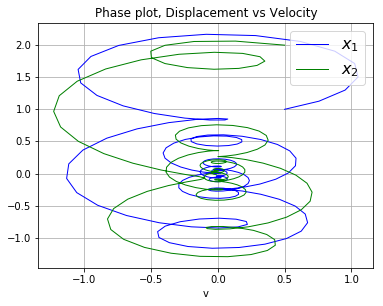

In [24]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline

t, x1, y1, x2, y2 = loadtxt('ejemplo2-4.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('v')
grid(True)
#hold(True)
lw = 1

plot(y1, x1, 'b', linewidth=lw)

plot(y2, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Phase plot, Displacement vs Velocity')
savefig('circulo2-4.png', dpi=100)